In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read in data
data = pd.read_csv("admissionNew.csv")
idealdata = pd.read_csv("idealAdmission.csv")

# Analyze Specified Data and Non-Categorical Feature Breakdown

In [31]:
# For ideal data set this to be "ideal" for not ideal use "not ideal"
datasetParam = "not ideal"
# Breakdown/analyze by either "Race" or "Sex" as specified below
breakdownParam = "Race" 
# Change below to non-categorical feature name we want to analyze
featureName = "Opportunities"

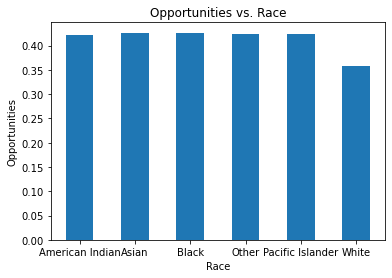

Race
American Indian     0.422777
Asian               0.425274
Black               0.426623
Other               0.424269
Pacific Islander    0.423266
White               0.358748
Name: mean, dtype: float64


In [32]:
# Analyze and breakdown feature based on above parameters
if datasetParam == "not ideal":
    usedData = data
else:
    usedData = idealdata
usedData = usedData[[breakdownParam,featureName]]
graphData = usedData.groupby(breakdownParam).describe()[featureName]["mean"]
values = graphData.to_list()
names = graphData.index.to_list()
plt.bar(names, values, width = 0.5)
plt.xlabel(breakdownParam)
plt.ylabel(featureName)
plt.title(featureName + " vs. "+breakdownParam)
plt.show()
print(graphData)

# Analyzing Non-Ideal Data

In [72]:
# Example of what data looks like
data.head()

,Intrinsic Abilities,Sex,Race,Income,Opportunities,Academic Qualification,Non-Academic Qualification,Diversity,SAT,GPA,Number of APs,Mean AP Score,Extracurriculars,Letters of Rec,Essay,Admission
0,0.765,Other,Black,22081,0.621,1.000,0.766,0.914,1522.0,4.00,5.0,4.0,0.728,0.299,1.063,Yes
1,0.560,Other,Asian,23334,0.624,0.867,0.936,0.908,1600.0,3.63,5.0,2.7,1.119,0.789,0.747,Yes
2,0.647,Male,Pacific Islander,74630,0.493,0.576,0.930,0.761,1015.0,3.09,5.0,2.9,0.877,0.980,0.836,No
3,0.836,Other,Other,5781,0.613,0.722,0.875,0.907,1198.0,3.64,4.0,2.5,1.242,0.897,1.036,No
4,0.780,Male,Other,108451,0.371,1.125,1.120,0.659,1226.0,2.89,4.0,4.2,0.953,0.838,0.832,Yes


In [6]:
# Look at categorical column values
print(data["Sex"].value_counts()/len(data))
print()

print(data["Race"].value_counts()/len(data))

Male      0.335267
Female    0.334000
Other     0.330733
Name: Sex, dtype: float64

White               0.171667
Asian               0.171167
Black               0.170167
American Indian     0.167800
Pacific Islander    0.162133
Other               0.157067
Name: Race, dtype: float64


In [7]:
# Look at non-categorical columns
data.describe()

,Intrinsic Abilities,Income,Opportunities,Academic Qualification,Non-Academic Qualification,Diversity,SAT,GPA,Number of APs,Mean AP Score,Extracurriculars,Letters of Rec,Essay
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.499355,89908.560167,0.471264,0.687025,0.802136,0.743225,1146.009967,3.185335,4.804800,3.204667,0.887813,0.819380,0.772521
std,0.148781,72482.884296,0.114291,0.227743,0.228588,0.128699,264.452379,0.519188,1.414719,0.553122,0.241686,0.242966,0.211599
min,0.000000,1.000000,0.226000,-0.046000,0.071000,0.469000,400.000000,0.780000,0.000000,1.000000,0.012000,-0.060000,0.006000
25%,0.399000,33958.750000,0.384000,0.534000,0.649000,0.645000,964.750000,2.830000,4.000000,2.800000,0.724000,0.654000,0.628000
50%,0.499000,71146.500000,0.492000,0.689000,0.803000,0.766000,1152.000000,3.200000,5.000000,3.200000,0.890500,0.822000,0.773000
75%,0.599000,127423.750000,0.566000,0.841000,0.957000,0.850000,1340.000000,3.580000,6.000000,3.600000,1.053000,0.985000,0.916000
max,1.000000,299964.000000,0.676000,1.454000,1.571000,0.961000,1600.000000,4.000000,8.000000,5.000000,1.512000,1.440000,1.336000


In [8]:
# Look at admission details
print(data["Admission"].value_counts()/len(data))

Yes    0.6419
No     0.3581
Name: Admission, dtype: float64


## Sex and Race Breakdown

In [9]:
pd.options.display.max_columns = 4000
data.groupby("Sex").describe()

Intrinsic Abilities                                                    \
                     count      mean       std  min      25%    50%      75%   
Sex                                                                            
Female             10020.0  0.500498  0.149144  0.0  0.40000  0.499  0.60125   
Male               10058.0  0.499328  0.147464  0.0  0.40000  0.500  0.59900   
Other               9922.0  0.498227  0.149745  0.0  0.39825  0.497  0.59800   

              Income                                                       \
        max    count          mean           std   min       25%      50%   
Sex                                                                         
Female  1.0  10020.0  88965.743713  72349.466286  15.0  32930.25  69986.0   
Male    1.0  10058.0  89685.129549  72524.654756  17.0  34195.25  70862.0   
Other   1.0   9922.0  91087.182020  72566.273294   1.0  34383.00  72460.0   

                            Opportunities                                    \
              75%       max         count      mean       std    min    25%   
Sex                                                                           
Female  126012.50  299964.0       10020.0  0.472670  0.114466  0.226  0.384   
Male    126341.25  299954.0       10058.0  0.471699  0.114241  0.231  0.384   
Other   129189.00  299939.0        9922.0  0.469403  0.114152  0.229  0.383   

                            Academic Qualification                             \
          50%    75%    max                  count      mean       std    min   
Sex                                                                             
Female  0.494  0.567  0.676                10020.0  0.688537  0.227920 -0.046   
Male    0.493  0.566  0.661                10058.0  0.687441  0.229313 -0.046   
Other   0.488  0.565  0.662                 9922.0  0.685076  0.225968 -0.046   

                                     Non-Academic Qualification            \
          25%    50%      75%    max                      count      mean   
Sex                                                                         
Female  0.534  0.688  0.84125  1.454                    10020.0  0.803239   
Male    0.533  0.688  0.84000  1.454                    10058.0  0.802050   
Other   0.534  0.691  0.84000  1.454                     9922.0  0.801110   

                                                      Diversity            \
             std    min      25%    50%    75%    max     count      mean   
Sex                                                                         
Female  0.230529  0.071  0.64700  0.806  0.958  1.571   10020.0  0.745082   
Male    0.227406  0.071  0.65225  0.805  0.955  1.571   10058.0  0.743717   
Other   0.227832  0.071  0.64800  0.799  0.957  1.571    9922.0  0.740852   

                                                         SAT               \
             std    min    25%    50%    75%    max    count         mean   
Sex                                                                         
Female  0.128791  0.469  0.647  0.768  0.851  0.957  10020.0  1145.624052   
Male    0.128747  0.476  0.645  0.767  0.851  0.959  10058.0  1148.499801   
Other   0.128534  0.474  0.643  0.762  0.849  0.961   9922.0  1143.875731   

                                                              GPA            \
               std    min    25%     50%     75%     max    count      mean   
Sex                                                                           
Female  264.477686  400.0  963.0  1152.0  1343.0  1600.0  10020.0  3.183159   
Male    264.170275  400.0  967.0  1154.0  1342.0  1600.0  10058.0  3.190519   
Other   264.718382  400.0  964.0  1151.0  1335.0  1600.0   9922.0  3.182278   

                                              Number of APs            \
             std   min   25%   50%   75%  max         count      mean   
Sex                                                                     
Female  0.519312  

In [10]:
data.groupby(["Sex","Admission"]).size()

Sex     Admission
Female  No           3541
        Yes          6479
Male    No           3633
        Yes          6425
Other   No           3569
        Yes          6353
dtype: int64

In [11]:
pd.options.display.max_columns = 4000
data.groupby("Race").describe()

Intrinsic Abilities                                    \
                               count      mean       std  min      25%   
Race                                                                     
American Indian               5034.0  0.497979  0.147229  0.0  0.39800   
Asian                         5135.0  0.499910  0.148591  0.0  0.40100   
Black                         5105.0  0.498285  0.146708  0.0  0.39800   
Other                         4712.0  0.498815  0.149847  0.0  0.39800   
Pacific Islander              4864.0  0.499720  0.150317  0.0  0.39900   
White                         5150.0  0.501357  0.150122  0.0  0.40225   

                                        Income                              \
                     50%      75%  max   count          mean           std   
Race                                                                         
American Indian   0.4980  0.59700  1.0  5034.0  87759.600715  71393.977801   
Asian             0.4980  0.60200  1.0  5135.0  89852.317235  72654.075569   
Black             0.4980  0.59700  1.0  5105.0  90678.581978  73411.086710   
Other             0.4960  0.59800  1.0  4712.0  88402.035017  73088.951142   
Pacific Islander  0.5020  0.60000  1.0  4864.0  87361.440995  71527.291583   
White             0.5015  0.60175  1.0  5150.0  95085.966408  72540.522297   

                                                               Opportunities  \
                   min       25%      50%        75%       max         count   
Race                                                                           
American Indian    2.0  33120.25  68020.0  126260.25  299918.0        5034.0   
Asian             30.0  34104.50  69532.0  127860.00  299915.0        5135.0   
Black             25.0  34118.00  70379.0  130154.00  299964.0        5105.0   
Other              1.0  32670.25  67060.5  125264.50  299954.0        4712.0   
Pacific Islander  15.0  32255.50  67734.5  124147.00  299826.0        4864.0   
White             40.0  40244.50  81934.0  130859.50  299939.0        5150.0   

                                                                         \
                      mean       std    min    25%    50%    75%    max   
Race                                                                      
American Indian   0.474804  0.113791  0.232  0.385  0.496  0.567  0.663   
Asian             0.471456  0.114288  0.229  0.383  0.495  0.566  0.660   
Black             0.470409  0.115337  0.226  0.383  0.492  0.567  0.660   
Other             0.474230  0.114950  0.226  0.383  0.498  0.567  0.664   
Pacific Islander  0.475966  0.114076  0.233  0.386  0.498  0.568  0.660   
White             0.461305  0.112766  0.236  0.382  0.452  0.559  0.676   

                 Academic Qualification                                      \
                                  count      mean       std    min      25%   
Race                                                                          
American Indian                  5034.0  0.692252  0.229080 -0.046  0.54400   
Asian                            5135.0  0.686134  0.227415 -0.046  0.53100   
Black                            5105.0  0.682586  0.227028 -0.046  0.53100   
Other                            4712.0  0.682571  0.226355 -0.046  0.53475   
Pacific Islander                 4864.0  0.691310  0.227465 -0.046  0.53300   
White                            5150.0  0.687229  0.228920 -0.046  0.53025   

                                         Non-Academic Qualification            \
                     50%      75%    max                      count      mean   
Race                                                                            
American Indian   0.6970  0.84275  1.454                     5034.0  0.806030   
Asian             0.6870  0.83950  1.454                     5135.0  0.797045   
Black             0.6860  0.83600  1.398                     5105.0  0.801560   
Other             0.6820  0.83700  1.454            

In [12]:
data.groupby(["Race","Admission"]).size()

Race              Admission
American Indian   No           1755
                  Yes          3279
Asian             No           1856
                  Yes          3279
Black             No           1833
                  Yes          3272
Other             No           1670
                  Yes          3042
Pacific Islander  No           1758
                  Yes          3106
White             No           1871
                  Yes          3279
dtype: int64

# Analyzing Ideal World Data

In [13]:
# Example of what data looks like
idealdata.head()

,Intrinsic Abilities,Sex,Race,Income,Opportunities,Academic Qualification,Non-Academic Qualification,Diversity,SAT,GPA,Number of APs,Mean AP Score,Extracurriculars,Letters of Rec,Essay,Admission
0,0.765,Other,Black,4138,0.616,0.206,0.219,0.817,1481.0,1.93,2.0,2.8,0.211,0.912,0.844,Yes
1,0.560,Other,Asian,17015,0.432,0.662,0.533,0.833,1132.0,3.36,5.0,3.8,0.175,0.650,0.591,No
2,0.647,Male,Pacific Islander,56332,0.493,0.365,0.448,0.701,905.0,3.29,5.0,2.4,0.588,0.871,0.485,Yes
3,0.836,Other,Other,29289,0.510,0.390,0.643,0.780,552.0,2.08,5.0,3.4,0.251,0.526,0.359,No
4,0.780,Male,Other,67902,0.569,0.503,0.988,0.696,1090.0,2.82,3.0,3.4,0.552,0.984,0.638,Yes


In [14]:
# Look at categorical column values
print(idealdata["Sex"].value_counts()/len(idealdata))
print()

print(idealdata["Race"].value_counts()/len(idealdata))

Male      0.335267
Female    0.334000
Other     0.330733
Name: Sex, dtype: float64

White               0.171667
Asian               0.171167
Black               0.170167
American Indian     0.167800
Pacific Islander    0.162133
Other               0.157067
Name: Race, dtype: float64


In [15]:
# Look at non-categorical columns
idealdata.describe()

,Intrinsic Abilities,Income,Opportunities,Academic Qualification,Non-Academic Qualification,Diversity,SAT,GPA,Number of APs,Mean AP Score,Extracurriculars,Letters of Rec,Essay
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.499355,89535.642500,0.499479,0.605233,0.522687,0.661890,1108.041767,3.111811,4.489100,3.119890,0.473967,0.642077,0.557603
std,0.148781,72818.136987,0.149041,0.234962,0.232992,0.129516,267.201137,0.525193,1.414007,0.559318,0.242434,0.244442,0.210602
min,0.000000,1.000000,0.000000,-0.148000,-0.228000,0.388000,400.000000,0.950000,-0.000000,0.700000,-0.293000,-0.125000,-0.177000
25%,0.399000,33869.500000,0.400000,0.445000,0.366000,0.562000,924.000000,2.750000,4.000000,2.700000,0.310000,0.478000,0.414000
50%,0.499000,69084.000000,0.499000,0.604000,0.524000,0.687000,1110.000000,3.120000,4.000000,3.100000,0.473000,0.639000,0.558000
75%,0.599000,127745.500000,0.599000,0.766000,0.680000,0.768000,1300.000000,3.500000,5.000000,3.500000,0.638000,0.807000,0.701000
max,1.000000,299991.000000,1.000000,1.352000,1.272000,0.876000,1600.000000,4.000000,8.000000,5.000000,1.207000,1.375000,1.153000


In [16]:
# Look at admission details
print(idealdata["Admission"].value_counts()/len(idealdata))

Yes    0.595333
No     0.404667
Name: Admission, dtype: float64


## Sex and Race Breakdown

In [17]:
pd.options.display.max_columns = 4000
idealdata.groupby("Sex").describe()

Intrinsic Abilities                                                    \
                     count      mean       std  min      25%    50%      75%   
Sex                                                                            
Female             10020.0  0.500498  0.149144  0.0  0.40000  0.499  0.60125   
Male               10058.0  0.499328  0.147464  0.0  0.40000  0.500  0.59900   
Other               9922.0  0.498227  0.149745  0.0  0.39825  0.497  0.59800   

              Income                                                       \
        max    count          mean           std   min       25%      50%   
Sex                                                                         
Female  1.0  10020.0  89950.191816  73552.543628  12.0  33681.25  68748.0   
Male    1.0  10058.0  88516.756115  71916.352178   1.0  33902.25  69245.5   
Other   1.0   9922.0  90149.850837  72977.378759   2.0  33999.25  69418.5   

                            Opportunities                                  \
              75%       max         count      mean       std  min    25%   
Sex                                                                         
Female  128736.00  299991.0       10020.0  0.499470  0.148712  0.0  0.399   
Male    125148.25  299915.0       10058.0  0.499485  0.149991  0.0  0.398   
Other   129454.00  299983.0        9922.0  0.499481  0.148419  0.0  0.404   

                          Academic Qualification                             \
          50%    75%  max                  count      mean       std    min   
Sex                                                                           
Female  0.499  0.598  1.0                10020.0  0.605274  0.236690 -0.148   
Male    0.500  0.600  1.0                10058.0  0.604961  0.234591 -0.148   
Other   0.499  0.600  1.0                 9922.0  0.605468  0.233604 -0.148   

                                    Non-Academic Qualification            \
          25%     50%    75%    max                      count      mean   
Sex                                                                        
Female  0.446  0.6040  0.768  1.352                    10020.0  0.523869   
Male    0.444  0.6040  0.767  1.352                    10058.0  0.525545   
Other   0.444  0.6055  0.764  1.352                     9922.0  0.518598   

                                                    Diversity            \
             std    min    25%    50%    75%    max     count      mean   
Sex                                                                       
Female  0.233221 -0.228  0.368  0.523  0.683  1.272   10020.0  0.661572   
Male    0.232823 -0.228  0.369  0.525  0.683  1.272   10058.0  0.663176   
Other   0.232899 -0.228  0.360  0.522  0.675  1.272    9922.0  0.660907   

                                                           SAT               \
             std    min    25%    50%      75%    max    count         mean   
Sex                                                                           
Female  0.130283  0.394  0.562  0.687  0.76900  0.872  10020.0  1108.587924   
Male    0.128178  0.393  0.563  0.688  0.76875  0.876  10058.0  1103.422350   
Other   0.130089  0.388  0.561  0.687  0.76800  0.870   9922.0  1112.172949   

                                                               GPA            \
               std    min     25%     50%     75%     max    count      mean   
Sex                                                                            
Female  267.078839  400.0  924.00  1109.0  1302.0  1600.0  10020.0  3.117899   
Male    266.250222  400.0  920.00  1107.0  1292.0  1600.0  10058.0  3.105498   
Other   268.238785  400.0  928.25  1117.0  1305.0  1600.0   9922.0  3.112063   

                                              Number of APs            \
             std   min   25%   50%   75%  max         count      mean   
Sex                                                                     
Female  0.526002  0.95  2.76  3.13  3.51  

In [18]:
data.groupby(["Sex","Admission"]).size()

Sex     Admission
Female  No           3541
        Yes          6479
Male    No           3633
        Yes          6425
Other   No           3569
        Yes          6353
dtype: int64

In [19]:
pd.options.display.max_columns = 4000
idealdata.groupby("Race").describe()

Intrinsic Abilities                                    \
                               count      mean       std  min      25%   
Race                                                                     
American Indian               5034.0  0.497979  0.147229  0.0  0.39800   
Asian                         5135.0  0.499910  0.148591  0.0  0.40100   
Black                         5105.0  0.498285  0.146708  0.0  0.39800   
Other                         4712.0  0.498815  0.149847  0.0  0.39800   
Pacific Islander              4864.0  0.499720  0.150317  0.0  0.39900   
White                         5150.0  0.501357  0.150122  0.0  0.40225   

                                        Income                              \
                     50%      75%  max   count          mean           std   
Race                                                                         
American Indian   0.4980  0.59700  1.0  5034.0  89935.437823  72830.813885   
Asian             0.4980  0.60200  1.0  5135.0  89680.755988  73477.103372   
Black             0.4980  0.59700  1.0  5105.0  90271.654652  73440.974646   
Other             0.4960  0.59800  1.0  4712.0  88465.407258  71693.088160   
Pacific Islander  0.5020  0.60000  1.0  4864.0  89248.772615  72006.571268   
White             0.5015  0.60175  1.0  5150.0  89520.732621  73330.218367   

                                                               Opportunities  \
                   min       25%      50%        75%       max         count   
Race                                                                           
American Indian    4.0  33488.75  69531.0  128480.00  299666.0        5034.0   
Asian             11.0  33558.50  68727.0  127098.50  299983.0        5135.0   
Black             55.0  33303.00  70154.0  130663.00  299945.0        5105.0   
Other             21.0  34105.25  68761.0  125540.25  299915.0        4712.0   
Pacific Islander   1.0  34908.50  69450.5  127598.00  299669.0        4864.0   
White             12.0  33957.00  67960.0  127756.25  299991.0        5150.0   

                                                                           \
                      mean       std    min    25%    50%      75%    max   
Race                                                                        
American Indian   0.500332  0.150813  0.000  0.401  0.499  0.60075  1.000   
Asian             0.498942  0.147098  0.000  0.398  0.499  0.60000  1.000   
Black             0.501273  0.147976  0.014  0.404  0.498  0.60100  1.000   
Other             0.500059  0.150898  0.000  0.402  0.500  0.59800  1.000   
Pacific Islander  0.496431  0.148958  0.000  0.394  0.498  0.59400  1.000   
White             0.499750  0.148670  0.000  0.400  0.501  0.60100  0.987   

                 Academic Qualification                                      \
                                  count      mean       std    min      25%   
Race                                                                          
American Indian                  5034.0  0.602526  0.233404 -0.148  0.44425   
Asian                            5135.0  0.610348  0.236954 -0.148  0.45100   
Black                            5105.0  0.609405  0.232210 -0.148  0.44900   
Other                            4712.0  0.605882  0.231960 -0.148  0.44700   
Pacific Islander                 4864.0  0.600818  0.234099 -0.148  0.43800   
White                            5150.0  0.602220  0.240618 -0.148  0.43400   

                                      Non-Academic Qualification            \
                    50%    75%    max                      count      mean   
Race                                                                         
American Indian   0.602  0.762  1.352                     5034.0  0.525637   
Asian             0.609  0.773  1.352                     5135.0  0.521943   
Black             0.610  0.771  1.352                     5105.0  0.518929   
Other             0.602  0.765  1.352               

In [20]:
idealdata.groupby(["Race","Admission"]).size()

Race              Admission
American Indian   No           2029
                  Yes          3005
Asian             No           2051
                  Yes          3084
Black             No           2083
                  Yes          3022
Other             No           1896
                  Yes          2816
Pacific Islander  No           2020
                  Yes          2844
White             No           2061
                  Yes          3089
dtype: int64